# Analysis of Variance

Suppose that we have multiple "groups" of data.  They may all come from the same population (and thus we would expect them all to have self-consistent sample means and variances.  Or, they may come from different populations, in which case we might expect their sample means and variances to differ from one another.  The process of ANalysis Of VAriance (ANOVA) is designed to assess which of these two situations exist.

We begin by assuming a null hypothesis - all of the groups come from the same population, and thus we expect the sample means to be consistent with one another.  Of course, we still expect some variance in the data WITHIN each group, due to random statistical fluctuations in any sampling experiment.

Imagine an experiment in which there are three groups of data, all taken from the same population, which has mu=100 and sigma=10

Variance of all 300 data points = 82.99


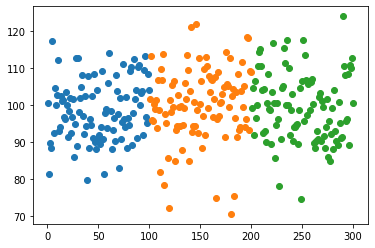

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

mu = 100
sigma = 10
N1 = 300

data1 = stats.norm.rvs(size=N1,loc=mu,scale=sigma)
group1a = data1[0:int(N1/3)]
group1b = data1[int(N1/3):int(2*N1/3)]
group1c = data1[int(2*N1/3):N1]

x1a = np.linspace(1,int(N1/3),int(N1/3))
x1b = np.linspace(int(N1/3)+1,int(2*N1/3),int(N1/3))
x1c = np.linspace(int(2*N1/3)+1,N1,int(N1/3))

plt.scatter(x1a,group1a)
plt.scatter(x1b,group1b)
plt.scatter(x1c,group1c)

print ("Variance of all 300 data points = %0.2f" % (data1.var()))

Now, imagine a second experiment, where there are three groups of data.  The three groups are taken from three different populations, with means of mu = (100, 110, 90).  The standard deviation of each of these populations is sigma = 6.0 

Variance of all 300 data points = 104.67


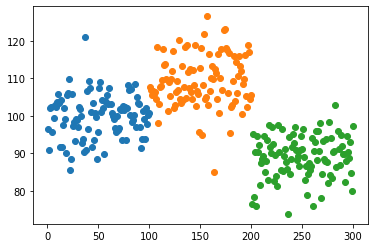

In [72]:
mu1 = 100
mu2 = 110
mu3 = 90

sigma = 6.2
N2 = 300

group2a = stats.norm.rvs(size=int(N2/3),loc=mu1,scale=sigma)
group2b = stats.norm.rvs(size=int(N2/3),loc=mu2,scale=sigma)
group2c = stats.norm.rvs(size=int(N2/3),loc=mu3,scale=sigma)

data2 = np.concatenate([group2a,group2b,group2c])

x2a = np.linspace(1,int(N2/3),int(N2/3))
x2b = np.linspace(int(N2/3)+1,int(2*N2/3),int(N2/3))
x2c = np.linspace(int(2*N2/3)+1,int(N2),int(N2/3))

plt.scatter(x2a,group2a)
plt.scatter(x2b,group2b)
plt.scatter(x2c,group2c)

print ("Variance of all 300 data points = %0.2f" % (data2.var()))

## The question is:  How do we differentiate between these two cases?

We will introduce some new terminology:

The number of data points within each group = $n$

The number of groups = $a$

The total number of data points = $N$ = $a \cdot n$

The overall average of all $N$ data points = $\bar{\bar{x}} = \frac{1}{N} \sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ij}}$

The average of the $n$ data points for a group = $\bar{x}_i = \frac{1}{N} \sum_{j=1}^{n} {x_{ij}}$

Recall the definition of variance:

$s^2 = \frac{1}{N_{dof}} \sum_{i=1}^{a} \sum_{j=1}^{n} {(x_{ij}-\bar{\bar{x}})^2} = \frac{SS_{total}}{N_{dof}}$

where we have introduced the terminology "SS" = "Sum of Squares" to indicate the double summation term. $SS_{total}$ represents the total variance of the entire data set with respect to the overall sample mean of all data points.

We may also calculate two other sums of squares - one related to the statistical variation WITHIN groups, and a second related to the variation BETWEEN groups:

$SS_{error} = \sum_{i=1}^{a} \sum_{j=1}^{n}(x_{ij} - \bar{x}_i)^2$

$SS_{treatment} = \sum_{i=1}^{a} n(\bar{x}_i - \bar{\bar{x}})^2$

In [77]:
dof1 = N1 - 1
SS1_total = dof1*data1.var(ddof=1)
print ("SS1_total = ",SS1_total)

xbarbar1 = data1.mean()
print ("Xbarbar1 = ",xbarbar1)

t1a = int(N1/3)*(group1a.mean()-xbarbar1)**2
t1b = int(N1/3)*(group1b.mean()-xbarbar1)**2
t1c = int(N1/3)*(group1c.mean()-xbarbar1)**2

SS1_treatment = t1a + t1b + t1c
print()
print ("SS1_treatment = ",SS1_treatment)

SS1_error = 0.0
for x in group1a:
    SS1_error += (x - group1a.mean())**2
for x in group1b:
    SS1_error += (x - group1b.mean())**2
for x in group1c:
    SS1_error += (x - group1c.mean())**2
    
print ("SS1_error = ",SS1_error)

print ()
print ("Total Check: ",SS1_error + SS1_treatment, SS1_total)

SS1_total =  24895.56292056345
Xbarbar1 =  99.36179272956772

SS1_treatment =  127.28503476131841
SS1_error =  24768.277885802145

Total Check:  24895.56292056346 24895.56292056345


In [78]:
dof2 = N2 - 1
SS2_total = dof2*data2.var(ddof=1)
print ("SS2_total = ",SS2_total)

xbarbar2 = data2.mean()
print ("Xbarbar2 = ",xbarbar2)

sst = 0.0
for x in data2:
    sst += (x-xbarbar2)**2

t2a = int(N2/3)*(group2a.mean()-xbarbar2)**2
t2b = int(N2/3)*(group2b.mean()-xbarbar2)**2
t2c = int(N2/3)*(group2c.mean()-xbarbar2)**2

SS2_treatment = t2a + t2b + t2c
print()
print ("SS2_treatment = ",SS2_treatment)

SS2_error = 0.0
for x in group2a:
    SS2_error += (x - group2a.mean())**2
for x in group2b:
    SS2_error += (x - group2b.mean())**2
for x in group2c:
    SS2_error += (x - group2c.mean())**2
    
print ("SS2_error =",SS2_error)

print()
print ("Total Check: ",SS2_error + SS2_treatment, SS2_total)

SS2_total =  31400.75182188486
Xbarbar2 =  99.48406450460404

SS2_treatment =  20218.462667414235
SS2_error = 11182.289154470645

Total Check:  31400.751821884878 31400.75182188486


24895.56292056345


127.28503476131841


24768.277885802145
24895.56292056346 24895.56292056345
